# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:

# Defining the pathway to the switch scanner metrics.
path_switchscan_metrics = '../SourceData/switch_scanner_metrics_retrain.xlsx'

# Importing the excel sheets for 4 vote and 7 vote thresholds.
df_2thr_1000ms = pd.read_excel(path_switchscan_metrics, '2_votes')
df_3thr_1000ms = pd.read_excel(path_switchscan_metrics, '3_votes')
df_4thr_1000ms = pd.read_excel(path_switchscan_metrics, '4_votes')
df_5thr_1000ms = pd.read_excel(path_switchscan_metrics, '5_votes')
df_6thr_1000ms = pd.read_excel(path_switchscan_metrics, '6_votes')
df_7thr_1000ms = pd.read_excel(path_switchscan_metrics, '7_votes')

# Extracting only the summary rows for each day.
df_2thr_summary = df_2thr_1000ms.loc[df_2thr_1000ms['Date'].str.contains('Total'),:]
df_3thr_summary = df_3thr_1000ms.loc[df_3thr_1000ms['Date'].str.contains('Total'),:]
df_4thr_summary = df_4thr_1000ms.loc[df_4thr_1000ms['Date'].str.contains('Total'),:]
df_5thr_summary = df_5thr_1000ms.loc[df_5thr_1000ms['Date'].str.contains('Total'),:]
df_6thr_summary = df_6thr_1000ms.loc[df_6thr_1000ms['Date'].str.contains('Total'),:]
df_7thr_summary = df_7thr_1000ms.loc[df_7thr_1000ms['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
df_5thr_summary['Date'] = df_5thr_summary['Date'].str.replace('_Total', '')
df_6thr_summary['Date'] = df_6thr_summary['Date'].str.replace('_Total', '')
df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


/tmp/ipykernel_1012896/3597559115.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2thr_summary['Date'] = df_2thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_1012896/3597559115.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3thr_summary['Date'] = df_3thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_1012896/3597559115.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

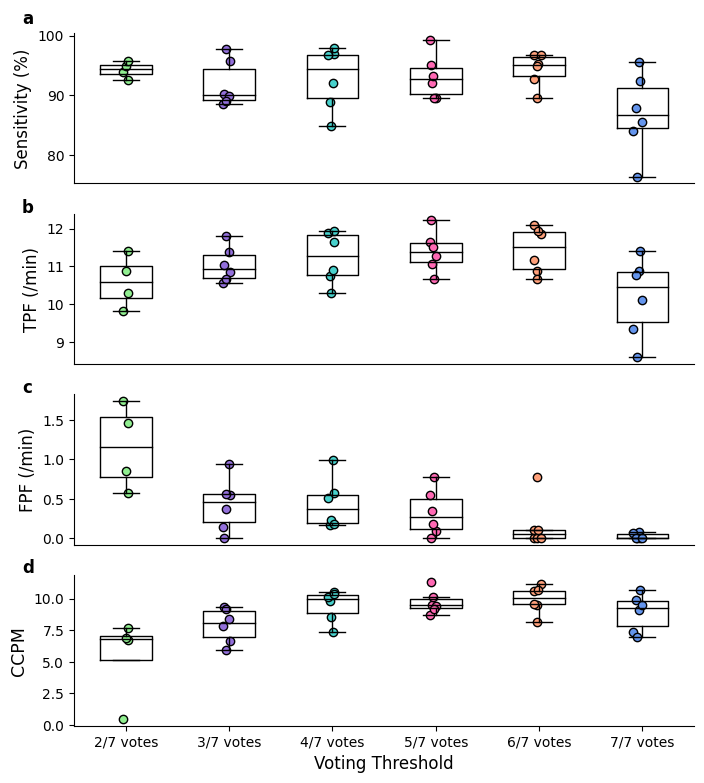

In [3]:
color_2thr = 'lightgreen'
color_3thr = 'mediumpurple'
color_4thr = 'mediumturquoise'
color_5thr = 'hotpink'
color_6thr = 'lightsalmon'
color_7thr = 'cornflowerblue'

save_figs = False


x = np.arange(6)+1
xlabels = ['2/7 votes', '3/7 votes', '4/7 votes', '5/7 votes', '6/7 votes', '7/7 votes']
palette = [color_2thr, color_3thr, color_4thr, color_5thr, color_6thr, color_7thr]
medianprops = dict(color='black')
alpha = 1

var = 0.04
xs = []
n_vals = [4,6,6,6,6,6]
for i in range(len(x)):
    xs.append(np.random.normal(i + 1-var/2, var, n_vals[i]))  # adds jitter to the data points - can be adjusted
    

y_acc = [df_2thr_summary['Sensitivity (%)'],\
         df_3thr_summary['Sensitivity (%)'],\
         df_4thr_summary['Sensitivity (%)'],\
         df_5thr_summary['Sensitivity (%)'],\
         df_6thr_summary['Sensitivity (%)'],\
         df_7thr_summary['Sensitivity (%)']]


y_tpr = [df_2thr_summary['TPF ( /min)'],\
         df_3thr_summary['TPF ( /min)'],\
         df_4thr_summary['TPF ( /min)'],\
         df_5thr_summary['TPF ( /min)'],\
         df_6thr_summary['TPF ( /min)'],\
         df_7thr_summary['TPF ( /min)']]

y_fpr = [df_2thr_summary['FPF ( /min)'],\
         df_3thr_summary['FPF ( /min)'],\
         df_4thr_summary['FPF ( /min)'],\
         df_5thr_summary['FPF ( /min)'],\
         df_6thr_summary['FPF ( /min)'],\
         df_7thr_summary['FPF ( /min)']]

y_ccpm = [df_2thr_summary['Correct CPM'],\
          df_3thr_summary['Correct CPM'],\
          df_4thr_summary['Correct CPM'],\
          df_5thr_summary['Correct CPM'],\
          df_6thr_summary['Correct CPM'],\
          df_7thr_summary['Correct CPM']]



fig, ax = plt.subplots(4, 1, figsize=(8,9))

# Sensitivity Sweep
ax[0].boxplot(y_acc, labels=xlabels, medianprops=medianprops, showfliers=False)
for x, val, c in zip(xs, y_acc, palette):
    ax[0].scatter(x, val, alpha=alpha, color=c, edgecolors='black')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel('Sensitivity (%)', fontsize = 12);
ax[0].set_xticks([]);

# TPR Sweep
ax[1].boxplot(y_tpr, labels=xlabels, medianprops=medianprops, showfliers=False)
for x, val, c in zip(xs, y_tpr, palette):
    ax[1].scatter(x, val, alpha=alpha, color=c, edgecolors='black')
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_ylabel('TPF (/min)', fontsize = 12);
ax[1].set_xticks([]);

# FPR Sweep
ax[2].boxplot(y_fpr, labels=xlabels, medianprops=medianprops, showfliers=False)
for x, val, c in zip(xs, y_fpr, palette):
    ax[2].scatter(x, val, alpha=alpha, color=c, edgecolors='black')
ax[2].spines[['right', 'top']].set_visible(False)
ax[2].set_ylabel('FPF (/min)', fontsize = 12);
ax[2].set_xticks([]);

# # CCPM Sweep
ax[3].boxplot(y_ccpm, labels=xlabels, medianprops=medianprops, showfliers=False)
for x, val, c in zip(xs, y_ccpm, palette):
    ax[3].scatter(x, val, alpha=alpha, color=c, edgecolors='black')
ax[3].spines[['right', 'top']].set_visible(False)
ax[3].set_ylabel('CCPM', fontsize = 12.5);
ax[3].set_xlabel('Voting Threshold', fontsize = 12)

fig.text(0.06, 0.89, 
         'a', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.06, 0.68, 
         'b', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.06, 0.48, 
         'c', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.06, 0.28, 
         'd', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')

if save_figs:
    fig.savefig('VotingThresholdSweep.jpg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('VotingThresholdSweep.svg', format='svg', bbox_inches = 'tight', dpi=1000)
